<a href="https://colab.research.google.com/github/Djuikem/Master_Thesis_AIMS/blob/main/final_Image_to_Tabular_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

# Dossier racine des images classées en sous-dossiers
root_dir = "/content/drive/MyDrive/data/test"
output_csv = "/content/drive/MyDrive/image_features_with_labels.csv"

# Charger le modèle pré-entraîné
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Stockage
features_list = []
labels_list = []
filenames_list = []

# Parcourir toutes les classes
for class_name in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_name)
    if os.path.isdir(class_path):
        for fname in os.listdir(class_path):
            if fname.lower().endswith(('.png')):
                img_path = os.path.join(class_path, fname)
                try:
                    # Charger et prétraiter l’image
                    img = image.load_img(img_path, target_size=(299, 299))
                    img_array = image.img_to_array(img)
                    img_array = np.expand_dims(img_array, axis=0)
                    img_array = preprocess_input(img_array)

                    # Extraire les features
                    features = model.predict(img_array)
                    features_list.append(features.flatten())
                    labels_list.append(class_name)
                    filenames_list.append(fname)
                except Exception as e:
                    print(f"Erreur avec {img_path} : {e}")

# Créer le DataFrame
df = pd.DataFrame(features_list)
df.insert(0, "label", labels_list)
df.insert(1, "filename", filenames_list)

# Sauvegarder
df.to_csv(output_csv, index=False)
print(f"Fichier tabulaire généré : {output_csv}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/image_features_with_labels.csv")

df.shape

(4235, 514)

In [ ]:
df.head()

,label,filename,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,COVID,COVID-1010.png,1.743231,0.226590,0.571099,0.634336,0.000000,0.921276,0.162631,2.614538,...,2.545078,0.946762,7.312446,1.749903,0.043507,0.317910,0.001890,0.351172,1.673033,0.094979
1,COVID,COVID-1003.png,1.190213,1.164261,0.000000,0.000000,0.252647,0.000000,0.271471,0.038787,...,2.618820,1.973947,0.780010,2.272782,0.120198,2.385340,0.624050,0.395745,2.965516,0.000000
2,COVID,COVID-104.png,0.221874,0.253079,0.527912,0.020211,0.000000,0.000000,0.199903,0.228819,...,5.418281,0.426809,2.370729,0.165783,0.075991,0.208370,0.106878,0.139020,1.103391,0.104572
3,COVID,COVID-101.png,3.217279,0.000000,1.064889,0.000000,0.645406,0.048286,0.108280,0.112545,...,1.879920,0.893399,3.025658,1.292385,0.046079,2.943708,0.113850,0.321463,2.077892,0.008926
4,COVID,COVID-10.png,1.080481,0.181411,0.652225,0.064048,0.004909,0.033490,0.226750,0.869999,...,0.982639,0.550178,3.031385,2.306216,0.624244,0.059237,0.168730,0.551834,1.487658,0.319661


In [ ]:
X, y = df.iloc[:, 2:].values, df.iloc[:, 0].values

In [ ]:
# 📌 Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib seaborn tensorflow keras cvxopt psutil qpsolvers

# 📌 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from qpsolvers import solve_qp  # Quadratic programming for Twin SVM
import numpy as np
from numpy.linalg import inv, norm
from sklearn.utils import check_X_y, check_array

# 📌 Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold


import cvxopt  # For LSSVM optimization

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.5 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 🔹 Standardize the data 🔹
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Split data into training and test sets 🔹
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 Function to evaluate models 🔹
def evaluate_model(model, X_train, X_test, y_train, y_test, custom=False):
    """Train and evaluate the model. If custom=True, assume it's a manual implementation like Twin SVM or LSSVM."""
    start_time = time.time()
    cpu_usage_start = psutil.cpu_percent()
    memory_usage_start = psutil.virtual_memory().used / (1024 ** 2)

    if custom:
        y_pred = model(X_train, y_train, X_test)  # Run the custom model function
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    end_time = time.time()
    cpu_usage_end = psutil.cpu_percent()
    memory_usage_end = psutil.virtual_memory().used / (1024 ** 2)

    accuracy = accuracy_score(y_test, y_pred)
    # precision = precision_score(y_test, y_pred, zero_division=0)
    # recall = recall_score(y_test, y_pred, zero_division=0)
    # f1 = f1_score(y_test, y_pred, zero_division=0)

     # 🐛 Changed 'average' to 'weighted' for multiclass precision
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    training_time = end_time - start_time
    cpu_usage = cpu_usage_end - cpu_usage_start
    memory_usage = memory_usage_end - memory_usage_start

    return accuracy, precision, recall, f1, training_time, cpu_usage, memory_usage, y_pred

# 🔹 SVM Models 🔹
svm_kernels = ['linear', 'poly', 'rbf']
svm_results = []
svm_preds = {}

for kernel in svm_kernels:
    svm = SVC(kernel=kernel, random_state=42, probability=True)
    results = evaluate_model(svm, X_train, X_test, y_train, y_test)
    svm_results.append(['SVM-' + kernel] + list(results[:-1]))
    svm_preds['SVM-' + kernel] = results[-1]

# 🔹 Twin Support Vector Machines (TWSVM) 🔹
def twin_svm(X_train, y_train, X_test):
    classes = np.unique(y_train)
    predictions = []

    for c in classes:
        # Label binarization: class c vs others
        y_bin = np.where(y_train == c, 1, -1)
        w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_bin
        pred = X_test @ w
        predictions.append(pred)

    # Choisir la classe dont le score est le plus élevé
    predictions = np.array(predictions)
    y_pred = np.argmax(predictions, axis=0)
    return classes[y_pred]

results = evaluate_model(twin_svm, X_train, X_test, y_train, y_test, custom=True)
svm_results.append(['Twin SVM'] + list(results[:-1]))
svm_preds['Twin SVM'] = results[-1]

# 🔹 Least Squares SVM (LSSVM) 🔹
def lssvm(X_train, y_train, X_test):
    classes = np.unique(y_train)
    predictions = []

    for c in classes:
        y_bin = np.where(y_train == c, 1, -1)
        K = X_train @ X_train.T + np.eye(len(X_train))
        alpha = np.linalg.solve(K, y_bin)
        pred = X_test @ X_train.T @ alpha
        predictions.append(pred)

    predictions = np.array(predictions)
    y_pred = np.argmax(predictions, axis=0)
    return classes[y_pred]


results = evaluate_model(lssvm, X_train, X_test, y_train, y_test, custom=True)
svm_results.append(['LSSVM'] + list(results[:-1]))
svm_preds['LSSVM'] = results[-1]

# 🔹 Combine results into a table 🔹
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Training Time (s)', 'CPU Usage (%)', 'Memory Usage (MB)']
results_df = pd.DataFrame(svm_results, columns=columns)

In [ ]:
# 🔹 Display results table 🔹
print("\nComparison of Models:")
print(results_df)


Comparison of Models:
        Model  Accuracy  Precision    Recall  F1-score  Training Time (s)  \
0  SVM-linear  0.822904   0.823847  0.822904  0.823134          18.937162   
1    SVM-poly  0.753247   0.808550  0.753247  0.739687          27.615092   
2     SVM-rbf  0.880756   0.884497  0.880756  0.880107          13.470939   
3    Twin SVM  0.835891   0.851485  0.835891  0.837326           1.022869   
4       LSSVM  0.835891   0.851485  0.835891  0.837326           5.202021   

   CPU Usage (%)  Memory Usage (MB)  
0           27.1        -113.921875  
1          -12.4         176.875000  
2           67.4           0.093750  
3           47.6          -6.550781  
4          -31.5          22.421875  


/tmp/ipython-input-11-145982146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='coolwarm')


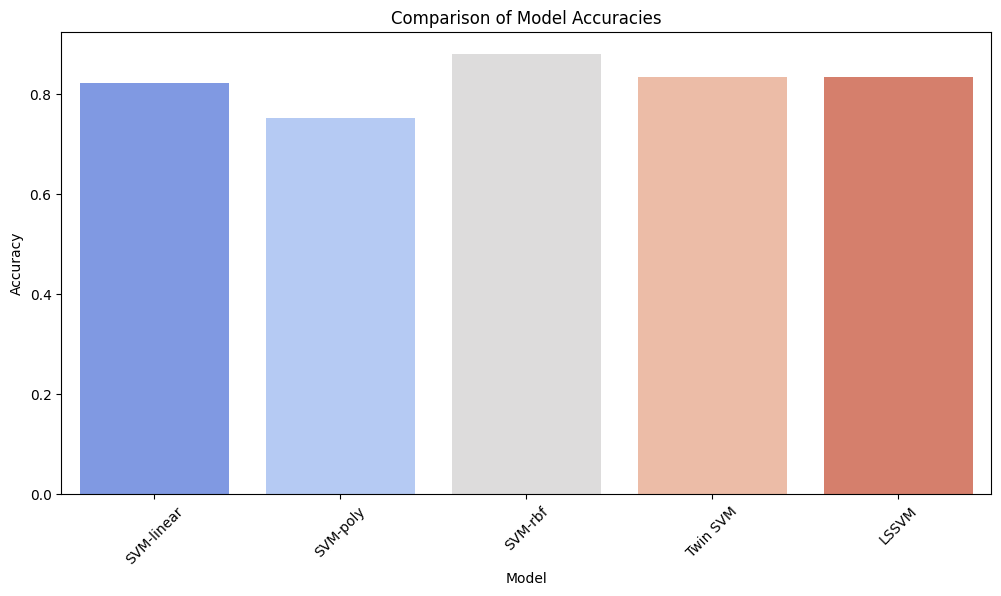

In [ ]:
# 📊 Visualizations 📊
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Comparison of Model Accuracies')
plt.show()

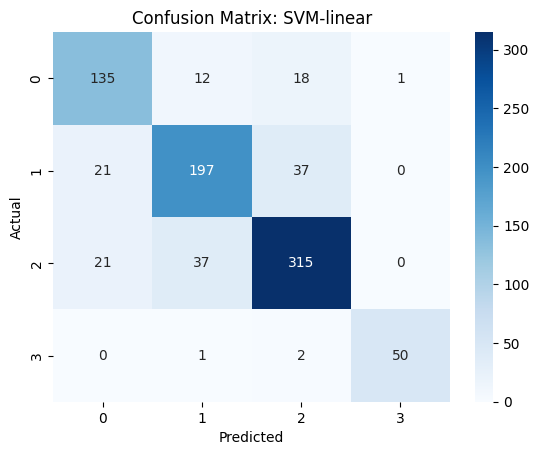

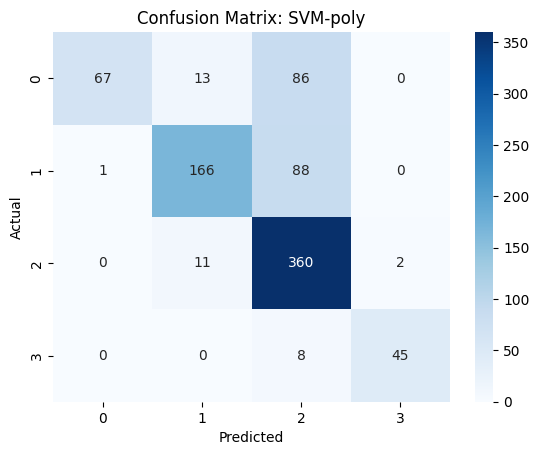

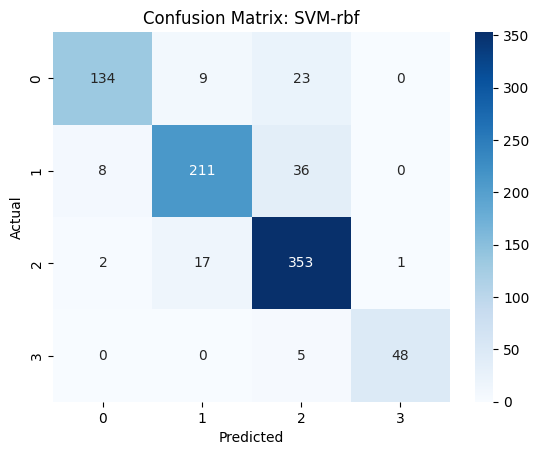

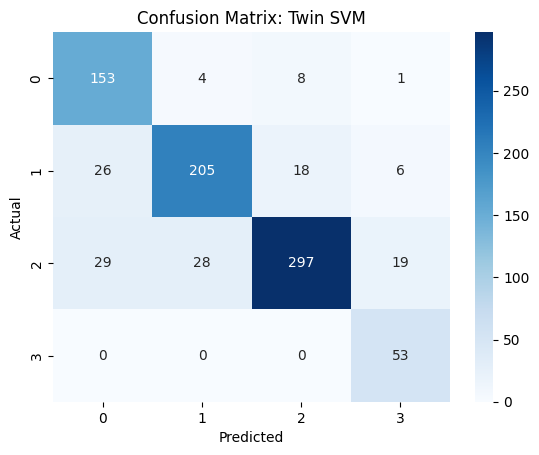

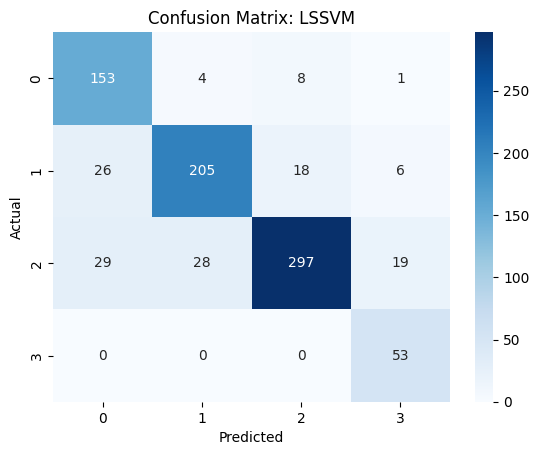

In [ ]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for model, preds in {**svm_preds}.items():
    plot_confusion_matrix(y_test, preds, model)

In [ ]:
def cross_validate_custom_model(model_func, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Convert labels for custom models expecting {-1, 1}
        y_train_signed = 2 * y_train - 1  # From {0, 1} to {-1, 1}

        start_time = time.time()
        cpu_usage_start = psutil.cpu_percent()
        memory_usage_start = psutil.virtual_memory().used / (1024 ** 2)

        y_pred = model_func(X_train, y_train_signed, X_test)

        end_time = time.time()
        cpu_usage_end = psutil.cpu_percent()
        memory_usage_end = psutil.virtual_memory().used / (1024 ** 2)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        train_time = end_time - start_time
        cpu = cpu_usage_end - cpu_usage_start
        mem = memory_usage_end - memory_usage_start

        metrics.append([acc, prec, rec, f1, train_time, cpu, mem])

    # Compute mean of metrics across folds
    mean_metrics = np.mean(metrics, axis=0)
    return mean_metrics

# Twin SVM CV
twin_svm_cv = cross_validate_custom_model(twin_svm, X_scaled, y)
svm_results.append(['Twin SVM (CV)'] + list(twin_svm_cv))

# LSSVM CV
lssvm_cv = cross_validate_custom_model(lssvm, X_scaled, y)
svm_results.append(['LSSVM (CV)'] + list(lssvm_cv))

labels = ["Accuracy", "Precision", "Recall", "F1-score", "Train Time (s)", "CPU Usage", "Memory Usage (MB)"]

print("🔹 Twin SVM Cross-Validation Results:")
for label, val in zip(labels, twin_svm_cv):
    print(f"{label}: {val:.4f}")

print("\n🔹 LSSVM Cross-Validation Results:")
for label, val in zip(labels, lssvm_cv):
    print(f"{label}: {val:.4f}")

🔹 Twin SVM Cross-Validation Results:
Accuracy: 0.2094
Precision: 0.0790
Recall: 0.2094
F1-score: 0.1122
Train Time (s): 0.2105
CPU Usage: 17.3200
Memory Usage (MB): 4.5172

🔹 LSSVM Cross-Validation Results:
Accuracy: 0.2094
Precision: 0.0790
Recall: 0.2094
F1-score: 0.1122
Train Time (s): 1.1060
CPU Usage: -30.7400
Memory Usage (MB): 10.2063


In [ ]:
# Cross-Validation
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("value of cv:", cv)

for kernel in svm_kernels:
  model_SVM = SVC(kernel=kernel, random_state=42, probability=True)

  grid = GridSearchCV(model_SVM, param_grid, cv=5)
  grid.fit(X_train, y_train)

  print("Best parameters:", grid.best_params_)
  print("Best score:", grid.best_score_)
  print("Best estimation:", grid.best_estimator_)

  # Evaluaion
  test_score = grid.score(X_test, y_test)
  print("Test accuracy:", test_score)

  scores_grid = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5)
  print("Mean Score:", scores_grid.mean())

  scores = cross_val_score(model_SVM, X_train, y_train, cv=cv) # With 5 fold
  print(f"Cross-validation scores for {kernel} kernel: {scores.mean()}")
  print("--------------------------------------------------------------")

value of cv: StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.881640327141693
Best estimation: SVC(C=10, probability=True, random_state=42)
Test accuracy: 0.8890200708382526
Mean Score: 0.881640327141693
Cross-validation scores for linear kernel: 0.8143505749380182
--------------------------------------------------------------
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.881640327141693
Best estimation: SVC(C=10, probability=True, random_state=42)
Test accuracy: 0.8890200708382526
Mean Score: 0.881640327141693
Cross-validation scores for poly kernel: 0.747344914881287
--------------------------------------------------------------
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.881640327141693
Best estimation: SVC(C=10, probability=True, random_state=42)
Test accuracy: 0.8890200708382526
Mean Score: 0.881640327141693
Cross-validation scores for

In [ ]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import shapiro, ttest_rel, wilcoxon
import numpy as np
from numpy.linalg import inv, norm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from qpsolvers import solve_qp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


# 🔹 Standardize the data 🔹
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Define models 🔹
svm_kernels = ['linear', 'poly', 'rbf']
svm_models = [SVC(kernel=k, probability=True, random_state=42) for k in svm_kernels]


# 🔹 Cross-validation 🔹
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = {name: [] for name in ['SVM-linear', 'SVM-poly', 'SVM-rbf']}

for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X_scaled, y)):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx] # Use scaled data
    y_train, y_test = y[train_idx], y[test_idx]

    for kernel, model in zip(svm_kernels, svm_models):
        # SVM models (SVC) handle {0, 1} labels directly
        # Reset the model for each fold to avoid retaining training state
        model = SVC(kernel=kernel, probability=True, random_state=42)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
        f1_scores[f'SVM-{kernel}'].append(f1)
        print(f"  SVM-{kernel} F1: {f1:.4f}")

# 🔹 Normality test (Shapiro) on differences 🔹
# Ensure both lists have the same number of elements before computing diff
if len(f1_scores['SVM-rbf']) == len(f1_scores['SVM-linear']):
    diff = np.array(f1_scores['SVM-rbf']) - np.array(f1_scores['SVM-linear'])
    # Shapiro test requires at least 3 samples.
    if len(diff) >= 3:
        try:
            shapiro_test = shapiro(diff)
            print("\nShapiro-Wilk Test:", shapiro_test)
            stat, p_value = shapiro_test
            print(f"Shapiro Statistic = {stat:.4f}, p-value = {p_value:.4f}")
            if p_value > 0.05:
                print("✅ Les différences suivent une loi normale (on peut utiliser le t-test).")
            else:
                print("❌ Les différences ne suivent pas une loi normale (préférer le test de Wilcoxon).")
        except ValueError as e:
             print(f"\nSkipping Shapiro-Wilk Test: {e}")
             shapiro_test = "N/A"
    else:
        print("\nSkipping Shapiro-Wilk Test: Need at least 3 folds.")
        shapiro_test = "N/A"

else:
    print("\nSkipping Shapiro-Wilk Test due to unequal number of folds.")
    shapiro_test = "N/A"


# 🔹 Paired t-test and Wilcoxon test 🔹
# Ensure both lists have the same number of elements before computing t-test/wilcoxon
if len(f1_scores['SVM-rbf']) == len(f1_scores['SVM-linear']):
    # Need at least 2 folds for t-test/wilcoxon
    if len(f1_scores['SVM-rbf']) >= 2:
        try:
            # Paired t-test assumes normal distribution of differences
            t_test = ttest_rel(f1_scores['SVM-rbf'], f1_scores['SVM-linear'])
            print("\nPaired t-test:", t_test)
            t_stat, p_value = t_test

            print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
            if p_value < 0.05:
                print("Différence significative entre les modèles.")
            else:
                print("Pas de différence significative.")
        except ValueError as e:
             print(f"\nSkipping Paired t-test: {e}")
             t_test = "N/A"

        try:
            # Wilcoxon signed-rank test is a non-parametric alternative
            wilcoxon_test = wilcoxon(f1_scores['SVM-rbf'], f1_scores['SVM-linear'])
            print("\nWilcoxon test:", wilcoxon_test)
            stat, p = wilcoxon_test

            print(f"Wilcoxon statistic = {stat:.4f}, p-value = {p:.4f}")
            if p < 0.05:
                print("Différence significative entre les modèles.")
            else:
                print("Pas de différence significative.")
        except ValueError as e:
             print(f"\nSkipping Wilcoxon test: {e}")
             wilcoxon_test = "N/A"

    else:
        print("\nSkipping t-test and Wilcoxon test: Need at least 2 folds.")
        t_test = "N/A"
        wilcoxon_test = "N/A"

else:
    print("\nSkipping t-test and Wilcoxon test due to unequal number of folds.")
    t_test = "N/A"
    wilcoxon_test = "N/A"


# 🔹 Results 🔹
print("\nF1-scores:", f1_scores)
# Shapiro test, t-test, and Wilcoxon test results are printed above

  SVM-linear F1: 0.8193
  SVM-poly F1: 0.7916
  SVM-rbf F1: 0.8835
  SVM-linear F1: 0.8198
  SVM-poly F1: 0.7566
  SVM-rbf F1: 0.8901
  SVM-linear F1: 0.8137
  SVM-poly F1: 0.7441
  SVM-rbf F1: 0.8695
  SVM-linear F1: 0.8091
  SVM-poly F1: 0.7349
  SVM-rbf F1: 0.8811
  SVM-linear F1: 0.8246
  SVM-poly F1: 0.7275
  SVM-rbf F1: 0.8953

Shapiro-Wilk Test: ShapiroResult(statistic=np.float64(0.8323858221812206), pvalue=np.float64(0.1449501394581459))
Shapiro Statistic = 0.8324, p-value = 0.1450
✅ Les différences suivent une loi normale (on peut utiliser le t-test).

Paired t-test: TtestResult(statistic=np.float64(22.002796432111246), pvalue=np.float64(2.5251244100788152e-05), df=np.int64(4))
t-statistic = 22.0028, p-value = 0.0000
Différence significative entre les modèles.

Wilcoxon test: WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(0.0625))
Wilcoxon statistic = 0.0000, p-value = 0.0625
Pas de différence significative.

F1-scores: {'SVM-linear': [0.819263037120427, 0.8197734